**Author: Muhammad Faiz Aji Prakoso**

# Health Insurance Cross Selling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn import over_sampling,under_sampling
from sklearn.ensemble import RandomForestClassifier

# Background

Our client was originally an insurance company that only focused on **health insurance services**. Seeing the potential that exists, our client plans to provide **vehicle insurance services** as well with the hope of **increasing the company's profits**. To make this new service successful, our client plans to use a **cross-selling strategy**.

Basically, cross-selling is a strategy to approach consumers who have **previously used the company's products**. In our client case, the approach was made to consumers who had **previously used health insurance services**. The **Sales Agent Team** was asked to make this strategy a success by taking a personal approach to each customer. However, the sales agent team **encountered problems** when approaching them customer.

Based on a report from the Sales Agent team, the cross-selling strategy was **considered ineffective**. Of all consumers who have been contacted by the sales agent, **only 12% are interested** in using vehicle insurance. Apart from these problems, contacting all consumers who use health services is also considered inefficient due to **limited time and human resources** in the Sales Agent team itself. To solve this problem, tools are needed that can **predict potential customers for vehicle insurance** in the hope that sales agents can approach them effectively and efficiently.

We offers a solution in the form of a **machine learning model** that can predict potential customers for vehicle insurance. With demographic data, vehicles and policy types from customers who use health insurance services, the machine learning model that is formed can predict potential customers who will be interested in using vehicle insurance services. With this prediction, the sales agent can build more effective and efficient communication to potential customers so that vehicle insurance service users will increase along with the **company's profits**.

# Data Understanding

In [2]:
df=pd.read_csv('data_train_health.csv')
df.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
236092,236093,Male,21,1,8.0,0,< 1 Year,Yes,36335.0,160.0,25,0
306058,306059,Male,26,1,48.0,0,< 1 Year,Yes,2630.0,152.0,268,0
211235,211236,Female,25,1,2.0,1,< 1 Year,No,33918.0,152.0,235,0
42826,42827,Female,40,1,31.0,1,1-2 Year,Yes,2630.0,26.0,280,0
144295,144296,Female,24,1,3.0,1,< 1 Year,No,32847.0,152.0,23,0


### Missing Value

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Duplicated Data

In [4]:
df.duplicated().sum()

0

### Unique Values

In [5]:
cat_types=['Gender','Vehicle_Age','Vehicle_Damage']
num_types=['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage']
all_col=['Gender','Vehicle_Age','Vehicle_Damage','Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage']

In [6]:
for i in all_col:
    print('{} Unique Value = {}'.format(i,len(df[i].unique())))

Gender Unique Value = 2
Vehicle_Age Unique Value = 3
Vehicle_Damage Unique Value = 2
Age Unique Value = 66
Driving_License Unique Value = 2
Region_Code Unique Value = 53
Previously_Insured Unique Value = 2
Annual_Premium Unique Value = 48838
Policy_Sales_Channel Unique Value = 155
Vintage Unique Value = 290


- **There is no missing and duplicated data**
- **There is no column with only 1 unique value**
- **Based on data types, Gender, vehicle age, and vehicle damage is included in categorical types (need to change it to numerical) while the other column are numerical**
- **However, there are some numerical data that supposed to be included in categorical type**

# Data Preparation

## Categorical Data

### Gender

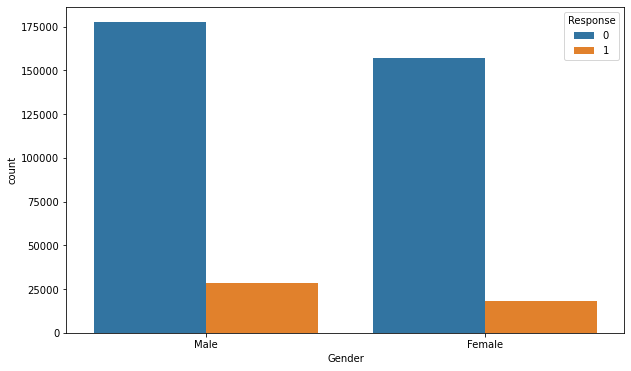

In [7]:
response=df['Response']
gender=df['Gender']
fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(x=gender,hue=response);

In [8]:
gender.value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

One Hot Encoding

In [9]:
gender_label = pd.get_dummies(df['Gender'],prefix='Gender')
gender_label

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
381104,0,1
381105,0,1
381106,0,1
381107,1,0


- **The difference between male and female number are not too big**
- **Change Gender data to label**

### Vehicle Age

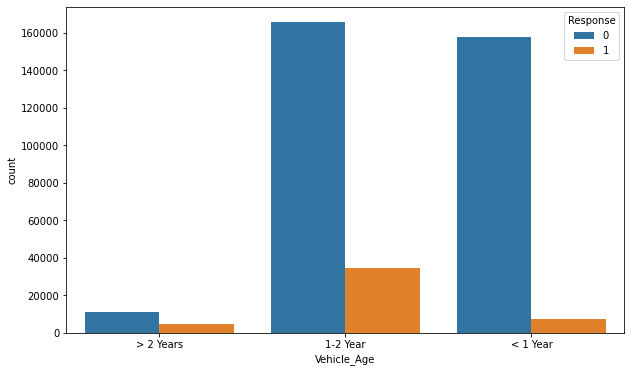

In [10]:
response=df['Response']
vehicle_age=df['Vehicle_Age']
fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(x=vehicle_age,hue=response);

In [11]:
Vehicle_Age_Label=[]

for index,column in df.iterrows():
    if column['Vehicle_Age'] == '> 2 Years':
        y = 2
    elif column['Vehicle_Age'] == '< 1 Year':
        y = 0
    else:
        y = 1
    Vehicle_Age_Label.append(y)

In [12]:
len(Vehicle_Age_Label)

381109

- **There is a big difference between > 2 Years vehicle age and the others**
- **Change Vehicle Age data to label**

### Vehicle Damage

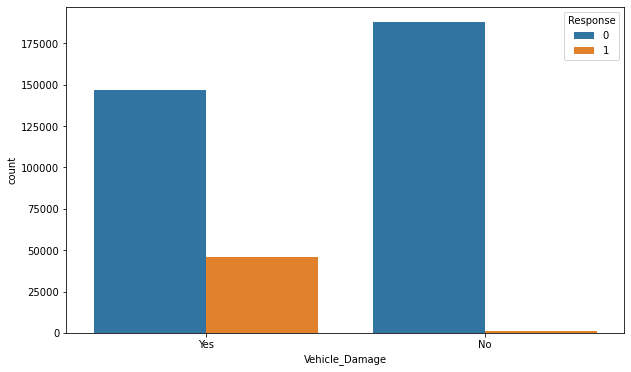

In [13]:
vehicle_damage = df['Vehicle_Damage']
fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(x=vehicle_damage,hue=response);

In [14]:
vehicle_damage.value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [15]:
vehicle_damage_label=df['Vehicle_Damage'].astype('category').cat.codes

- **The difference between yes and no number are not too big**
- **However, most of the customer who are interested have a damaged vehicle**
- **Change vehicle damage data to label**

In [16]:
df1=df.join(gender_label)
df1['Vehicle_Age_Label'] = Vehicle_Age_Label
df1['Vehicle_Damage_Label'] = vehicle_damage_label

In [17]:
df1.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_Label,Vehicle_Damage_Label
158861,158862,Male,21,1,46.0,1,< 1 Year,No,35102.0,152.0,252,0,0,1,0,0
296660,296661,Male,32,1,28.0,0,1-2 Year,No,57875.0,124.0,215,0,0,1,1,0
169551,169552,Female,41,1,46.0,1,1-2 Year,No,2630.0,152.0,182,0,1,0,1,0
332096,332097,Male,24,1,10.0,1,< 1 Year,No,23063.0,152.0,231,0,0,1,0,0
189329,189330,Male,23,1,45.0,1,< 1 Year,No,38846.0,152.0,284,0,0,1,0,0


## Numerical Data

### Age

In [18]:
df['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

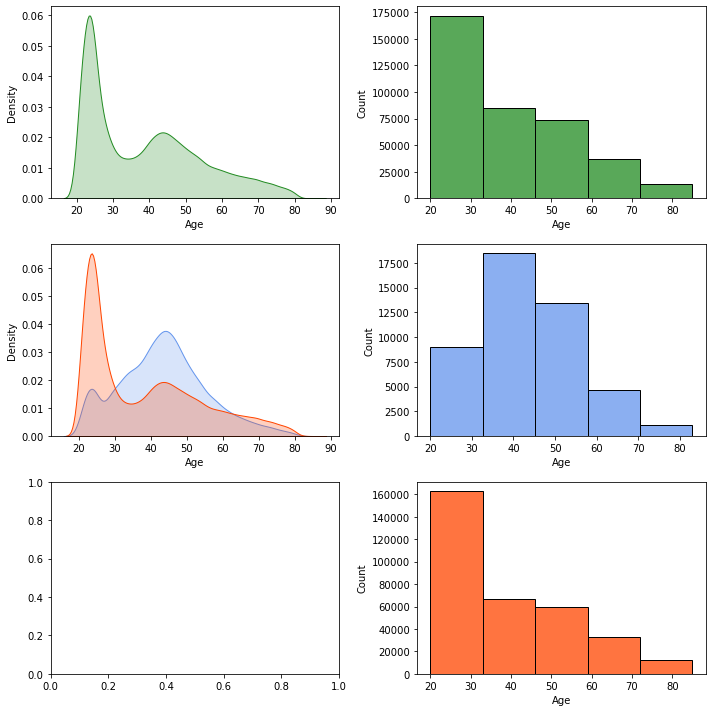

In [19]:
yes = df[response==1]
no = df[response==0]
fig,ax=plt.subplots(3,2,figsize=(10,10))
sns.kdeplot(x=df['Age'],color='forestgreen',shade=True,ax=ax[0,0])
#sns.histplot(x=df['Age'],color='green',ax=ax[0])
sns.kdeplot(x=yes['Age'],color='cornflowerblue',label='Yes',shade=True,ax=ax[1,0])
sns.kdeplot(x=no['Age'],color='orangered',label='No',shade=True,ax=ax[1,0])
sns.histplot(x=df['Age'],color='forestgreen',ax=ax[0,1],bins=5)
sns.histplot(x=yes['Age'],color='cornflowerblue',ax=ax[1,1],bins=5)
sns.histplot(x=no['Age'],color='orangered',ax=ax[2,1],bins=5)
plt.tight_layout();
#sns.kdeplot(x=no['Age'],color='red',label='No',ax=ax[1])

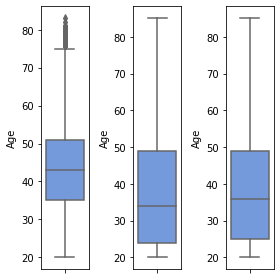

In [20]:
fig,ax=plt.subplots(1,3,figsize=(4,4))
sns.boxplot(y=yes['Age'],ax=ax[0],color='cornflowerblue')
sns.boxplot(y=no['Age'],ax=ax[1],color='cornflowerblue')
sns.boxplot(y=df['Age'],ax=ax[2],color='cornflowerblue')
plt.tight_layout()

In [21]:
print(len(df[df['Age'] <=35]))
print(len(df[(df['Age']>35) & (df['Age']<=60)]))
print(len(df[(df['Age']>60) & (df['Age']<=85)]))

186812
151058
43239


In [22]:
age_label=[]
for index,column in df1.iterrows():
    if column['Age'] <=35:
        w=0
    elif (column['Age'] > 35) & (column['Age'] <= 60):
        w=2
    else:
        w=1
    age_label.append(w)

In [23]:
df1['Age_Label']=age_label

- **The data is skewed**
- **classify the age into several age range would be better for machine learning model**

### Driving License

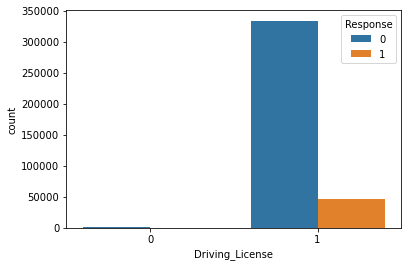

In [24]:
driving_license=df['Driving_License']
sns.countplot(x=driving_license,hue=response);

In [25]:
print('Overall')
print(driving_license.value_counts())
print()
print('Yes')
print(yes['Driving_License'].value_counts())
print()
print('No')
no['Driving_License'].value_counts()

Overall
1    380297
0       812
Name: Driving_License, dtype: int64

Yes
1    46669
0       41
Name: Driving_License, dtype: int64

No


1    333628
0       771
Name: Driving_License, dtype: int64

- **Most of the customer have a driving license, this column probably unimportant**
- **Need to reconsider this feature after check the evaluation metric of machine learning**

### Region_Code

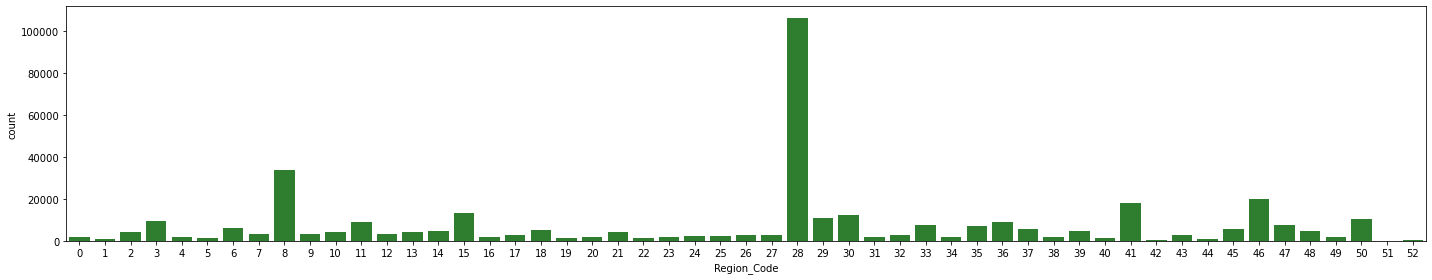

In [26]:
region_code=df['Region_Code']
fig,ax=plt.subplots(figsize=(20,4))
sns.countplot(x=region_code.astype(int),color='forestgreen')
plt.tight_layout();
#sns.distplot(yes['Region_Code'],ax=ax[1])
#sns.distplot(no['Region_Code'],ax=ax[1])

- **The customer distribution is concentrated only in few region**
- **Classify into small group probably necessary**

### Previously Insured

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

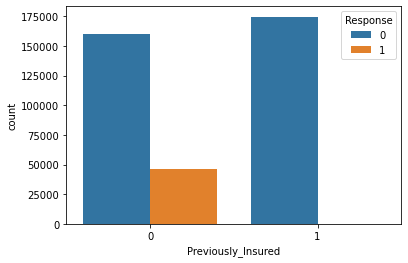

In [27]:
previously_insured=df['Previously_Insured']
sns.countplot(x=previously_insured,hue=response)

- **Most of the customer who are interested in using car insurance don't have it yet**

### Annual Premium

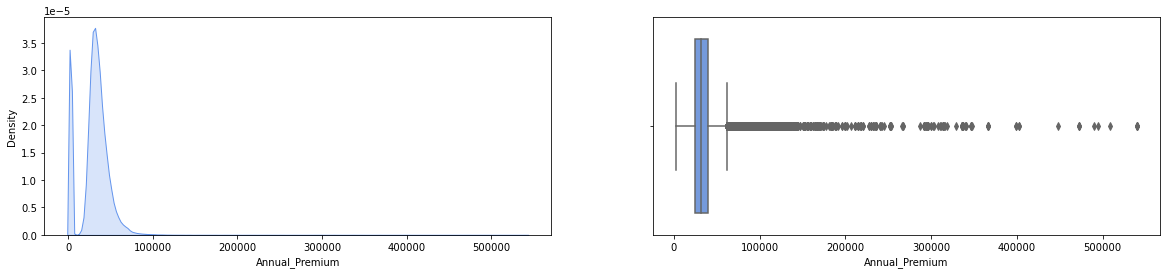

In [28]:
annual_premium=df['Annual_Premium']
fig,ax=plt.subplots(1,2,figsize=(20,4))
sns.kdeplot(x=annual_premium,ax=ax[0],color='cornflowerblue',shade=True)
sns.boxplot(x=annual_premium,ax=ax[1],color='cornflowerblue');

In [29]:
nums=['Annual_Premium']

In [30]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))
for col in nums:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries
    
df2 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 381109
Jumlah baris setelah memfilter outlier: 370789


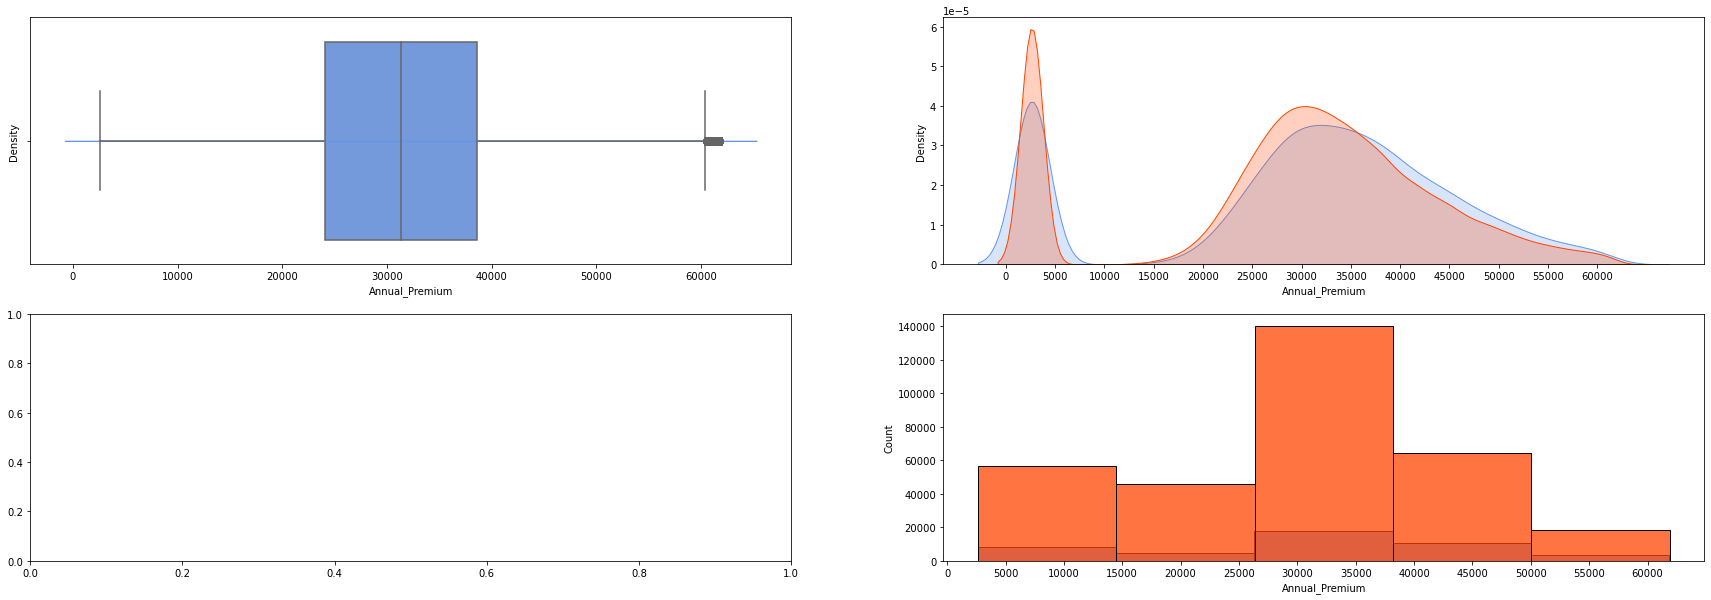

In [31]:
annual_premium2=df2['Annual_Premium']
yes2=df2[df2['Response']==1]
no2=df2[df2['Response']==0]
fig,ax=plt.subplots(2,2,figsize=(30,10))
sns.kdeplot(annual_premium2,ax=ax[0,0],color='cornflowerblue',shade=True)
sns.boxplot(x=annual_premium2,ax=ax[0,0],color='cornflowerblue')
sns.kdeplot(yes2['Annual_Premium'],ax=ax[0,1],color='cornflowerblue',label='yes',shade=True)
sns.kdeplot(no2['Annual_Premium'],ax=ax[0,1],color='orangered',label='no',shade=True)
sns.histplot(yes2['Annual_Premium'],ax=ax[1,1],bins=5,color='cornflowerblue')
sns.histplot(no2['Annual_Premium'],ax=ax[1,1],bins=5,color='orangered')
ax[1,1].set_xticks(range(0,62000,5000))
ax[0,1].set_xticks(range(0,62000,5000))
plt.tight_layout;

In [32]:
df2['Annual_Premium'].describe()

count    370789.000000
mean      29264.643973
std       14743.056656
min        2630.000000
25%       24102.000000
50%       31319.000000
75%       38596.000000
max       61892.000000
Name: Annual_Premium, dtype: float64

In [33]:
print(len(df2[df2['Annual_Premium'] <=15000]))
print(len(df2[(df2['Annual_Premium']>15000) & (df2['Annual_Premium']<=22000)]))
print(len(df2[(df2['Annual_Premium']>22000) & (df2['Annual_Premium']<=39000)]))
print(len(df2[(df2['Annual_Premium']>39000) & (df2['Annual_Premium']<=50000)]))
print(len(df2[(df2['Annual_Premium']>50000) & (df2['Annual_Premium']<=62000)]))

65267
13000
203871
66767
21884


In [34]:
c=df2['Annual_Premium'].astype('int').reset_index()
c.head()

,index,Annual_Premium
0,0,40454
1,1,33536
2,2,38294
3,3,28619
4,4,27496


In [35]:
annual_premium_label1=[]
for index,column in c.iterrows():
    if column['Annual_Premium'] <= 15000:
        w=3
    elif (column['Annual_Premium'] > 15000) & (column['Annual_Premium'] <= 22000):
        w=2
    elif (column['Annual_Premium'] > 22000) & (column['Annual_Premium'] <= 39000):
        w=0
    elif (column['Annual_Premium'] > 39000) & (column['Annual_Premium'] <= 50000):
        w=1
    else:
        w=4
    annual_premium_label1.append(w)

In [36]:
df3=df2.copy()
df3['Annual_Premium_Label']=annual_premium_label1

In [37]:
annual_premium_label_onehot=pd.get_dummies(df3['Annual_Premium_Label'],prefix='Annual_Premium')
annual_premium_label_onehot

,Annual_Premium_0,Annual_Premium_1,Annual_Premium_2,Annual_Premium_3,Annual_Premium_4
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
381104,1,0,0,0,0
381105,0,1,0,0,0
381106,1,0,0,0,0
381107,0,1,0,0,0


In [38]:
df3=df3.join(annual_premium_label_onehot)

In [39]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


- **Annual Premium has many outlier, need to remove the outlier using IQR method**
- **After remove the outlier, the distribution still skewed**
- **Normalize the data will not give any impact to the machine learning model (already tried), classify the annual premium into several group would be better**
- **One hots encoding to try it in Machine Learning model just in case the evaluation metric is not so good**

### Policy Sales Channel

In [40]:
df['Policy_Sales_Channel'].describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

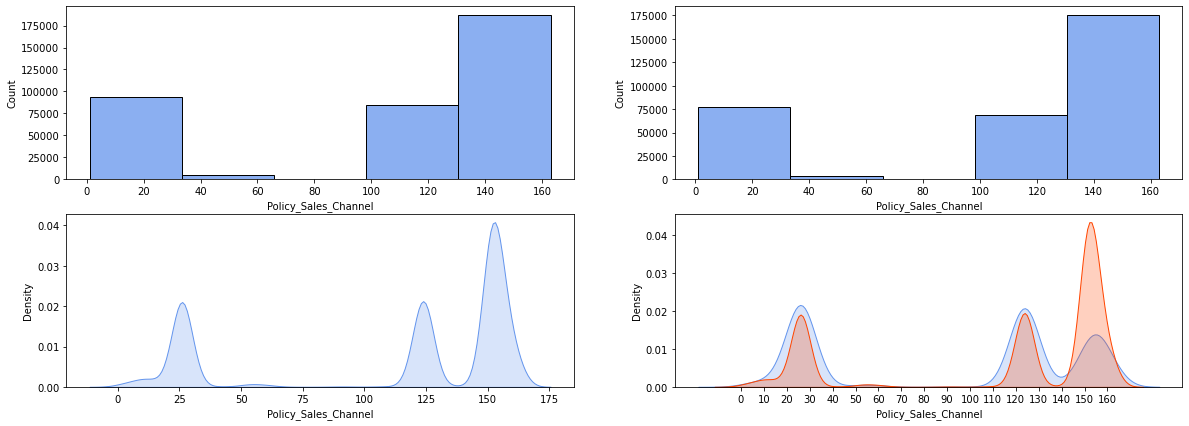

In [41]:
policy_sales_channel=df3['Policy_Sales_Channel']
fig,ax=plt.subplots(2,2,figsize=(20,7))
sns.histplot(x=policy_sales_channel,ax=ax[0,0],bins=5,color='cornflowerblue')
sns.histplot(x=no2['Policy_Sales_Channel'],ax=ax[0,1],color='cornflowerblue',bins=5)
sns.kdeplot(x=policy_sales_channel,ax=ax[1,0],color='cornflowerblue',shade=True)
sns.kdeplot(x=yes2['Policy_Sales_Channel'],ax=ax[1,1],color='cornflowerblue',shade=True)
sns.kdeplot(x=no2['Policy_Sales_Channel'],ax=ax[1,1],color='orangered',shade=True)
ax[1,1].set_xticks(range(0,170,10))
#sns.kdeplot(x=no2['Policy_Sales_Channel'],ax=ax[1],color='red');

In [42]:
df3['Policy_Sales_Channel'].describe()

count    370789.000000
mean        112.542923
std          54.039616
min           1.000000
25%          30.000000
50%         151.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

In [43]:
print(len(df3[df3['Policy_Sales_Channel'] <=40]))
print(len(df3[(df3['Policy_Sales_Channel']>105) & (df3['Policy_Sales_Channel']<=135)]))
print(len(df3[(df3['Policy_Sales_Channel']>135) & (df3['Policy_Sales_Channel']<=170)]))

94493
84489
187064


In [44]:
d=df3['Policy_Sales_Channel'].astype('int').reset_index()
d.head()

,index,Policy_Sales_Channel
0,0,26
1,1,26
2,2,26
3,3,152
4,4,152


In [45]:
policy_sales_channel_label=[]
for index,column in d.iterrows():
    if column['Policy_Sales_Channel'] <= 40:
        w=3
    elif (column['Policy_Sales_Channel'] > 105) & (column['Policy_Sales_Channel'] <= 135):
        w=2
    elif (column['Policy_Sales_Channel'] > 135) & (column['Policy_Sales_Channel'] <= 170):
        w=0
    else:
        w=1
    policy_sales_channel_label.append(w)

In [46]:
df3['policy_sales_channel_label']=policy_sales_channel_label

- **Same with region code, policy sales channel is concentrated in several point**
- **Classify the data into small group based on customer intention towards vehicle insurance**

### Vintage

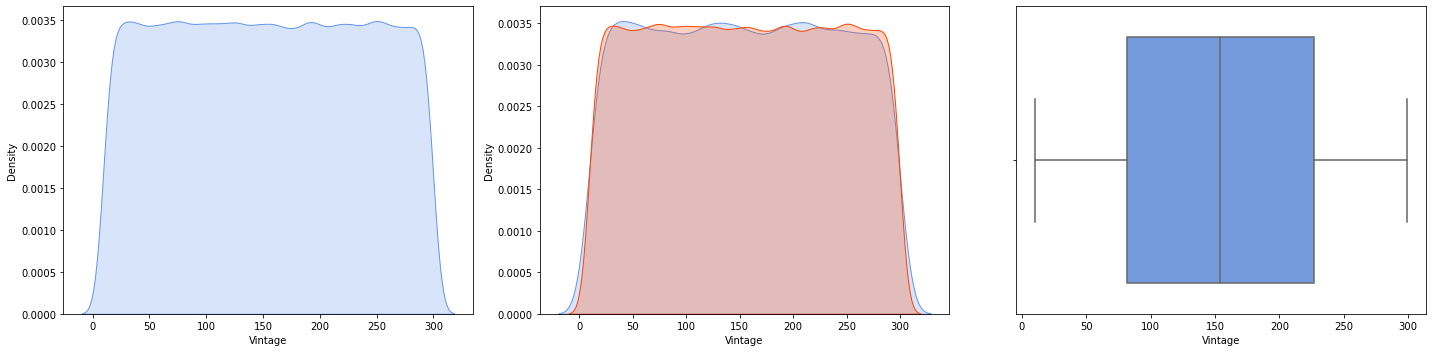

In [47]:
yes2=df3[df3['Response']==1]
no2=df3[df3['Response']==0]
vintage=df3['Vintage']
fig,ax=plt.subplots(1,3,figsize=(20,5))
sns.kdeplot(vintage,ax=ax[0],color='cornflowerblue',shade=True)
sns.kdeplot(yes2['Vintage'],ax=ax[1],color='cornflowerblue',label='yes',shade=True)
sns.kdeplot(no2['Vintage'],ax=ax[1],color='orangered',label='no',shade=True)
sns.boxplot(x=vintage,ax=ax[2],color='cornflowerblue')
plt.tight_layout();

In [48]:
vintage.value_counts()

256    1382
73     1375
282    1361
126    1355
158    1354
       ... 
224    1204
89     1201
205    1198
32     1194
277    1179
Name: Vintage, Length: 290, dtype: int64

In [49]:
df3['Vintage'].describe()

count    370789.000000
mean        154.345442
std          83.670478
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

In [50]:
vintage_by_month=[]
for index,column in df3.iterrows():
    y=round(column['Vintage']/30)
    vintage_by_month.append(y)

In [51]:
df3['vintage_by_month_round']=vintage_by_month

- **Vintage data represent the number of days customer has been associated with the company**
- **Transform the data into month (vintage data/30)**
- **Overall, the data is range between 1-10 which is easier for machine learning model to train**

# EDA & Business Insight

**In this part, the business insight will given based on the health insurance customer data. Hopefully this business insight can help the sales agent to improve their performance related with the cross-selling strategy**

## Potential Customer

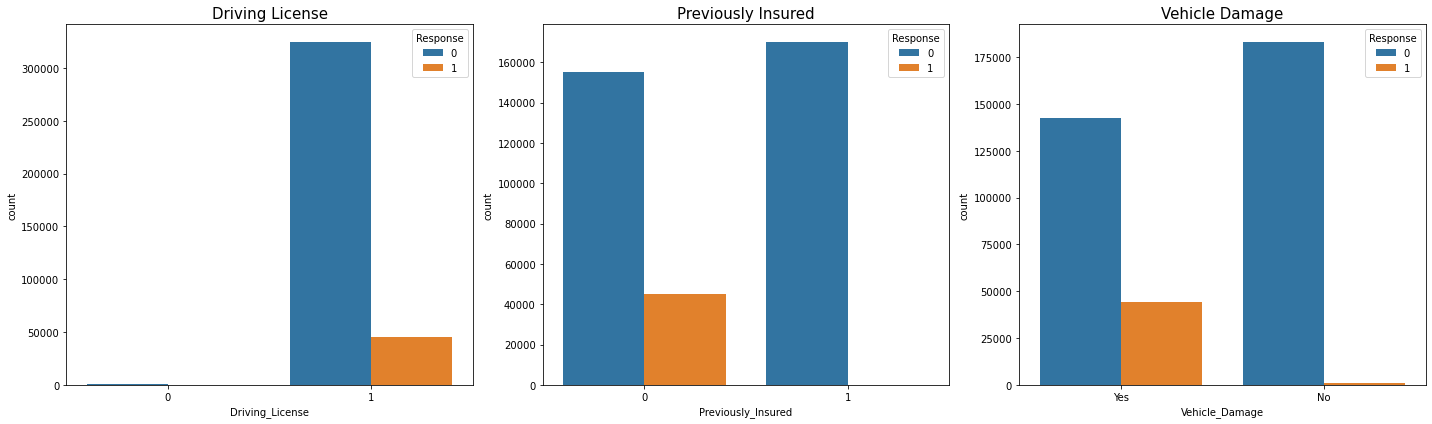

In [52]:
fix,ax=plt.subplots(1,3,figsize=(20,6))
sns.countplot(x=df3['Driving_License'],ax=ax[0],hue=response)
ax[0].set_title('Driving License',fontsize=15)
sns.countplot(x=df3['Previously_Insured'],ax=ax[1],hue=response)
ax[1].set_title('Previously Insured',fontsize=15)
sns.countplot(x=df3['Vehicle_Damage'],ax=ax[2],hue=response)
ax[2].set_title('Vehicle Damage',fontsize=15)
plt.tight_layout();

## Priority Customer

### Vehicle Age

In [53]:
yes3=df3[df3['Response']==1]
no3=df3[df3['Response']==0]

In [54]:
print('overall')
print(vehicle_age.value_counts())
print()
print('Yes')
print(yes3['Vehicle_Age'].value_counts())
print()
print('No')
print(no3['Vehicle_Age'].value_counts())

overall
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Yes
1-2 Year     33745
< 1 Year      7060
> 2 Years     4350
Name: Vehicle_Age, dtype: int64

No
1-2 Year     160467
< 1 Year     154487
> 2 Years     10680
Name: Vehicle_Age, dtype: int64


In [55]:
print(4350/(16007))
print(33745/200316)
print(7060/164786)

0.2717561067033173
0.1684588350406358
0.04284344543832607


In [56]:
text='''

Around 30% of customer
with > 2 Years vehicle
age are interested to
use vehicle insurance.

'''

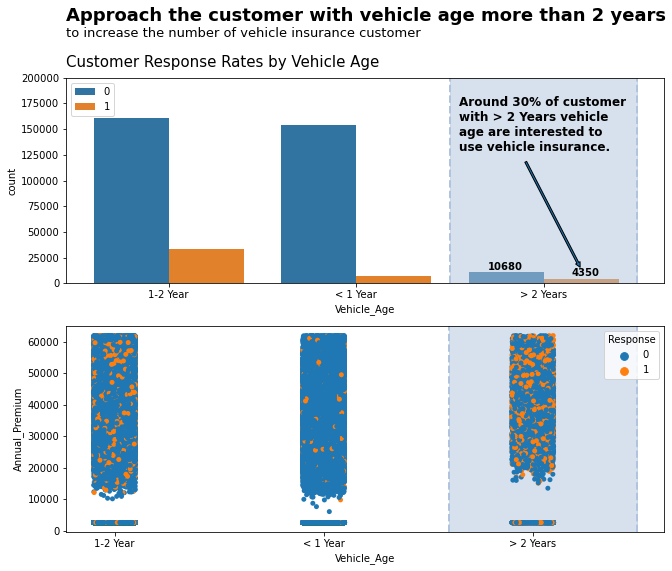

In [57]:
fig,ax=plt.subplots(2,1,figsize=(10,8))
sns.countplot(x=df3['Vehicle_Age'].sort_values(),ax=ax[0],hue=response)
ax[0].legend(loc=0)
ax[0].axvline(1.5,color='lightsteelblue',linestyle='--',linewidth=2)
ax[0].axvline(2.5,color='lightsteelblue',linestyle='--',linewidth=2)
ax[0].axvspan(1.5,2.5,color='lightsteelblue',alpha=0.5)
ax[0].text(x=1.55,y=100000,s=text,fontweight='bold',horizontalalignment='left',fontsize=12)
ax[0].set_ylim(0,200000)
ax[0].text(1.7,13000,s='10680',fontweight='bold')
ax[0].text(2.15,7000,s='4350',fontweight='bold')
ax[0].annotate(xy=(2.2,14000),xytext=(1.9,120000),text='',
              arrowprops=dict(ec='black',
                             arrowstyle='simple'))
ax[0].text(-0.55,255000,s='Approach the customer with vehicle age more than 2 years',fontsize=18,fontweight='bold')
ax[0].text(-0.55,240000,s='to increase the number of vehicle insurance customer',fontsize=13)
ax[0].text(-0.55,210000,s='Customer Response Rates by Vehicle Age',fontsize=15)

sns.stripplot(x=df3['Vehicle_Age'].sort_values(),y=df3['Annual_Premium'],ax=ax[1],hue=response)
ax[1].axvline(1.6,color='lightsteelblue',linestyle='--',linewidth=2)
ax[1].axvline(2.5,color='lightsteelblue',linestyle='--',linewidth=2)
ax[1].axvspan(1.6,2.5,color='lightsteelblue',alpha=0.5)
plt.tight_layout();

### Age

In [58]:
text='''
Customers over 30 tend to
be more interested in using
vehicle insurance
'''
text2='''
Around
30
'''

text3='''
Around
63
'''

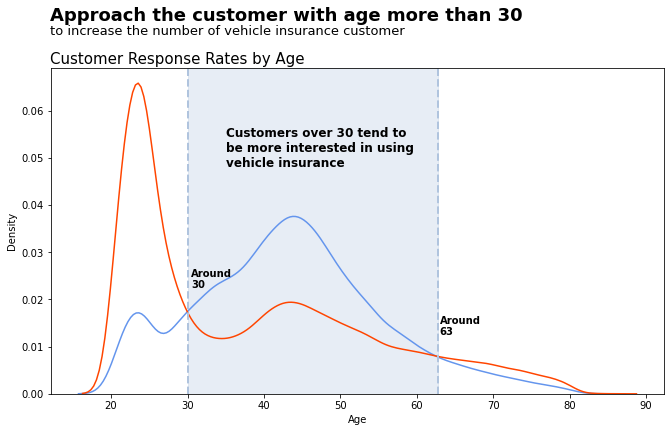

In [59]:
fig,ax=plt.subplots(1,1,figsize=(11,6))
sns.kdeplot(x=yes3['Age'],label='interested',color='cornflowerblue')
sns.kdeplot(x=no3['Age'],label='not interested',color='orangered')
plt.axvline(x=30,color='lightsteelblue',linestyle='--',linewidth=2)
plt.axvline(x=62.8,color='lightsteelblue',linestyle='--',linewidth=2)
plt.axvspan(30,62.8,color='lightsteelblue',alpha=0.3)
plt.text(x=35,y=0.045,s=text,fontweight='bold',fontsize=12)
plt.text(x=30.5,y=0.02,s=text2,fontweight='bold')
plt.text(x=63,y=0.01,s=text3,fontweight='bold')
#plt.annotate(xy=(30.5,0.02),xytext=(40,0.047),text='',
 #           arrowprops=dict(ec='black',
  #                         arrowstyle='simple'))

plt.text(12,0.079,s='Approach the customer with age more than 30',fontsize=18,fontweight='bold')
plt.text(12,0.076,s='to increase the number of vehicle insurance customer',fontsize=13)
plt.text(12,0.07,s='Customer Response Rates by Age',fontsize=15);

### Policy Sales Channel

In [60]:
psc=yes3.groupby('Policy_Sales_Channel').count().reset_index()
psc_yes=psc.sort_values('Policy_Sales_Channel',ascending=True)[['Policy_Sales_Channel','id']]
psc_no=no3.groupby('Policy_Sales_Channel').count().reset_index().sort_values('Policy_Sales_Channel',ascending=True)
psc_percentage=psc_yes.merge(psc_no,
                            left_on='Policy_Sales_Channel',
                            right_on='Policy_Sales_Channel',
                            how='left')
psc_percentage=psc_percentage[['Policy_Sales_Channel','id_x','id_y']]
psc_percentage['percentage']=round((psc_percentage['id_x']/(psc_percentage['id_x']+psc_percentage['id_y']))*100)
psc_priority=psc_percentage.sort_values('percentage',ascending=False).head(8)
psc_priority

,Policy_Sales_Channel,id_x,id_y,percentage
25,28.0,1,2.0,33.0
24,27.0,1,2.0,33.0
60,80.0,4,8.0,33.0
112,155.0,388,820.0,32.0
87,121.0,19,43.0,31.0
31,36.0,15,34.0,31.0
118,163.0,867,1989.0,30.0
2,3.0,145,341.0,30.0


### Region Code

In [61]:
region_code_yes=yes3.groupby('Region_Code').count().reset_index()[['Region_Code','id']]
region_code_no=no3.groupby('Region_Code').count().reset_index()[['Region_Code','id']]
region_code_yes['no']=region_code_no['id']
region_code_merge=region_code_yes.rename(columns={'id':'yes'})
region_code_merge['Percentage']=round((region_code_merge['yes']/(region_code_merge['yes']+region_code_merge['no']))*100)
best_region=region_code_merge.sort_values('Percentage',ascending=False).reset_index().head(6)
best_region

,index,Region_Code,yes,no,Percentage
0,28,28.0,18704,81037,19.0
1,38,38.0,386,1620,19.0
2,4,4.0,283,1513,16.0
3,19,19.0,250,1284,16.0
4,51,51.0,26,148,15.0
5,23,23.0,299,1659,15.0


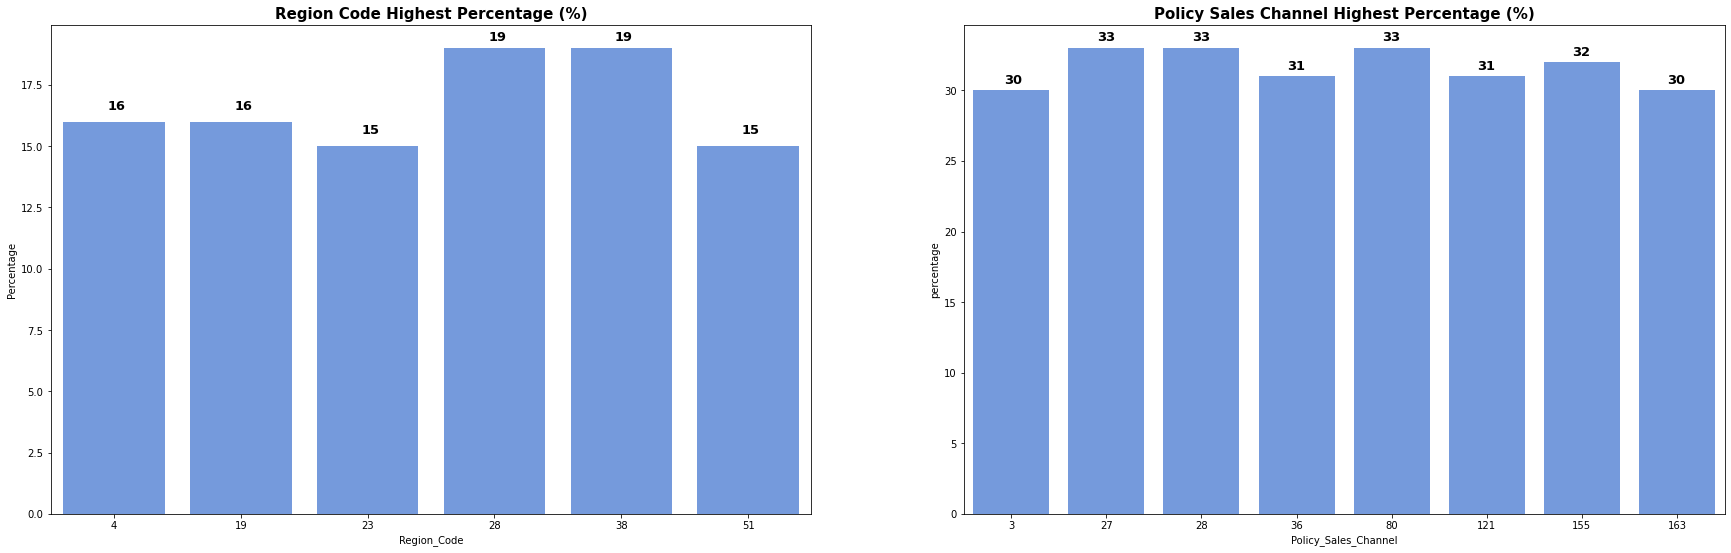

In [62]:
fig,ax=plt.subplots(1,2,figsize=(30,9))

sns.barplot(x=best_region['Region_Code'].astype(int),y=best_region['Percentage'],color='cornflowerblue',ax=ax[0])
ax[0].text(x=-0.05,y=16.5,s='16',fontweight='bold',fontsize=13)
ax[0].text(x=-0.05+1,y=16.5,s='16',fontweight='bold',fontsize=13)
ax[0].text(x=-0.05+2,y=15.5,s='15',fontweight='bold',fontsize=13)
ax[0].text(x=-0.05+5,y=15.5,s='15',fontweight='bold',fontsize=13)
ax[0].text(x=-0.05+3,y=19.3,s='19',fontweight='bold',fontsize=13)
ax[0].text(x=-0.05+4,y=19.3,s='19',fontweight='bold',fontsize=13)
ax[0].set_title('Region Code Highest Percentage (%)',fontsize=15,fontweight='bold')

sns.barplot(x=psc_priority['Policy_Sales_Channel'].astype(int),y=psc_priority['percentage'],color='cornflowerblue',ax=ax[1])
ax[1].set_title('Policy Sales Channel Highest Percentage (%)',fontsize=15,fontweight='bold')
ax[1].text(x=-0.07,y=30.5,s='30',fontweight='bold',fontsize=13)
ax[1].text(x=0.05+0.85,y=33.5,s='33',fontweight='bold',fontsize=13)
ax[1].text(x=0.05+1.85,y=33.5,s='33',fontweight='bold',fontsize=13)
ax[1].text(x=0.05+2.85,y=31.5,s='31',fontweight='bold',fontsize=13)
ax[1].text(x=0.05+3.85,y=33.5,s='33',fontweight='bold',fontsize=13)
ax[1].text(x=0.05+4.85,y=31.5,s='31',fontweight='bold',fontsize=13)
ax[1].text(x=0.05+5.85,y=32.5,s='32',fontweight='bold',fontsize=13)
ax[1].text(x=0.05+6.85,y=30.5,s='30',fontweight='bold',fontsize=13);

## **There are several points that we can conclude from the data:**
## **Potential Customer**
- Basically, vehicle insurance potential customer are customer who has **driving license**, **previously has insured**, and has experienced **vehicle damage.**

## **Priority Customer**

### **Age**
- Prioritize customer with **age between 30-62**, because most of the customer who interested in vehicle insurance are come from that age range.
- Customer with age **below 30** are not really interested with vehicle insurance. However, since the number of customer in this age range is quite big, we need to **consider another strategy** to approach this age range. **Other vehicle insurance package with lower annual premium** perhaps will acceptable because this age range probably don't have big income. 

### **Vehicle Age**
- Prioritize customer with **vehicle age more than 2 years**, even though the number of interested in this category is not bigger than the other, the percentage is quite big. Around 30% of customer with vehicle age more than 2 years is interested in using vehicle insurance.
- Same approach strategy with age, **package with lower annual premium** perhaps can attract customer with vehicle age less than 2 years

### **Region Code**
- Overall, there are 6 region with **highest percentage, 4, 19, 23, 28, 38, and 51.**
- First, **focus on approaching customer in those region**, because the success rate is higher than the other region.
- After finish with those region, **approaching other region still necessary**. But, to make it more efficient, it would be better if machine learning model is used (will be discussed after this part)

### **Policy Sales Channel**
- Overall, there are 6 policy sales channel with **highest percentage, 3, 27, 38, 36, 80, 121, 155, and 163.**
- Sales agent is **recommended to use those channel** method since the success rate is higher compare with the other channel.

# Modelling

In [63]:
df4=df3[['Age_Label','Driving_License','Region_Code','Previously_Insured','policy_sales_channel_label','vintage_by_month_round','Gender_Female','Gender_Male','Vehicle_Age_Label','Vehicle_Damage_Label','Annual_Premium_Label','Response']]
df4.sample(5)

,Age_Label,Driving_License,Region_Code,Previously_Insured,policy_sales_channel_label,vintage_by_month_round,Gender_Female,Gender_Male,Vehicle_Age_Label,Vehicle_Damage_Label,Annual_Premium_Label,Response
366524,2,1,28.0,0,3,5,1,0,1,1,0,0
158042,1,1,9.0,1,1,5,1,0,1,0,3,0
348550,0,1,28.0,1,0,8,1,0,0,0,1,0
119874,1,1,28.0,0,0,3,1,0,1,1,0,0
203465,0,1,11.0,0,0,2,0,1,1,0,3,0


### Split Train & Test Data

In [64]:
x=df4.drop(['Response'],axis=1)
y=df4['Response']
xtrain1,xtest,ytrain1,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

### Oversampling

In [65]:
x=df4.drop('Response',axis=1)
y=df4['Response']
print(x.shape)
print(y.shape)

(370789, 11)
(370789,)


In [66]:
x_over,y_over=over_sampling.RandomOverSampler().fit_resample(x,y)
print(pd.Series(y_over).value_counts())
train1=x_over
train1['Response']=y_over
train1.head()

1    325634
0    325634
Name: Response, dtype: int64


,Age_Label,Driving_License,Region_Code,Previously_Insured,policy_sales_channel_label,vintage_by_month_round,Gender_Female,Gender_Male,Vehicle_Age_Label,Vehicle_Damage_Label,Annual_Premium_Label,Response
0,2,1,28.0,0,3,7,0,1,2,1,1,1
1,1,1,3.0,0,3,6,0,1,1,0,0,0
2,2,1,28.0,0,3,1,0,1,2,1,0,1
3,0,1,11.0,1,0,7,0,1,0,0,0,0
4,0,1,41.0,1,0,1,1,0,0,0,0,0


### Split Train & Test Data

In [67]:
x=train1.drop(['Response'],axis=1)
y=train1['Response']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

### Modelling

In [68]:
regressors = [LogisticRegression(max_iter=1000),
              XGBClassifier(eval_metric='auc',
                            use_label_encoder =False),
              AdaBoostClassifier(),
              KNeighborsClassifier(),
              RandomForestClassifier(),
              DecisionTreeClassifier()]

eval_test = pd.DataFrame(columns = ['Method','Accuracy', 'Precision', 'Recall', 'ROC-AUC'])
eval_train = pd.DataFrame(columns = ['Method','Accuracy', 'Precision', 'Recall', 'ROC-AUC'])

In [69]:
for regressor in regressors:
    regressor.fit(xtrain, ytrain)
    ypred = regressor.predict(xtest)
    
    method = str(type(regressor)).split('.')[-1][:-2]
    
    accuracy = accuracy_score(ytest, ypred)
    
    precision = precision_score(ytest, ypred)
    
    recall = recall_score(ytest, ypred)
    
    ROC_AUC = roc_auc_score(ytest,ypred)
    
    eval_test = eval_test.append({'Method': method, 
                    'Accuracy': accuracy, 
                    'Precision': precision,
                    'Recall': recall,
                    'ROC-AUC': ROC_AUC},
                     ignore_index=True)

In [70]:
eval_test

,Method,Accuracy,Precision,Recall,ROC-AUC
0,LogisticRegression,0.784472,0.706277,0.974815,0.784265
1,XGBClassifier,0.801306,0.738638,0.933280,0.801162
2,AdaBoostClassifier,0.786028,0.711454,0.963148,0.785835
3,KNeighborsClassifier,0.798455,0.749964,0.896111,0.798349
4,RandomForestClassifier,0.832230,0.771374,0.944876,0.832107
5,DecisionTreeClassifier,0.830848,0.772646,0.938106,0.830731


In [71]:
for regressor in regressors:
    regressor.fit(xtrain, ytrain)
    ypred = regressor.predict(xtrain)
    
    method = str(type(regressor)).split('.')[-1][:-2]
    
    accuracy = accuracy_score(ytrain, ypred)
    
    precision = precision_score(ytrain, ypred)
    
    recall = recall_score(ytrain, ypred)
    
    ROC_AUC = roc_auc_score(ytrain,ypred)
    
    eval_train = eval_train.append({'Method': method, 
                    'Accuracy': accuracy, 
                    'Precision': precision,
                    'Recall': recall,
                    'ROC-AUC': ROC_AUC},
                     ignore_index=True)

In [72]:
eval_train

,Method,Accuracy,Precision,Recall,ROC-AUC
0,LogisticRegression,0.784567,0.705751,0.975755,0.784657
1,XGBClassifier,0.803780,0.739477,0.937754,0.803843
2,AdaBoostClassifier,0.786094,0.710879,0.964093,0.786177
3,KNeighborsClassifier,0.817238,0.767761,0.909383,0.817281
4,RandomForestClassifier,0.849632,0.787387,0.957733,0.849682
5,DecisionTreeClassifier,0.849636,0.789884,0.952506,0.849684


## Tuning Hyperparameter for the Best Model (Random Forest)

In [73]:
rf_param=RandomForestClassifier(random_state= 42,
                          n_estimators = 500,
                          max_depth = 40,
                          min_samples_leaf=1)
rf_param.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=40, n_estimators=500, random_state=42)

In [74]:
ypred_param = rf_param.predict(xtest)
print('accuracy')
print(accuracy_score(ytest, ypred_param))
print('')
print('precision')
print(precision_score(ytest, ypred_param))
print('')
print('recall')
print(recall_score(ytest, ypred_param))
print('')
print('roc_auc')
print(roc_auc_score(ytest,ypred_param))

accuracy
0.8321842963235934

precision
0.7714249926934157

recall
0.9446302033804718

roc_auc
0.8320615765221755


In [75]:
ypred_param = rf_param.predict(xtrain)
print('accuracy')
print(accuracy_score(ytrain, ypred_param))
print('')
print('precision')
print(precision_score(ytrain, ypred_param))
print('')
print('recall')
print(recall_score(ytrain, ypred_param))
print('')
print('roc_auc')
print(roc_auc_score(ytrain,ypred_param))

accuracy
0.8496337908297451

precision
0.7876888733162596

recall
0.9571009098609972

roc_auc
0.849683978280641


In [76]:
rf_param.feature_importances_

array([0.03555388, 0.0011715 , 0.16898417, 0.26647045, 0.04612167,
       0.08362905, 0.00221736, 0.00220657, 0.06585213, 0.3055689 ,
       0.02222431])

Text(0.5, 1.0, 'feature importance score')

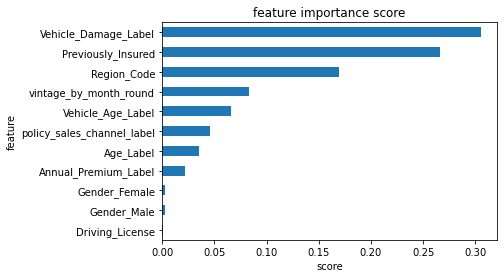

In [77]:
feat_importances = pd.Series(rf_param.feature_importances_,index=xtrain.columns)
ax=feat_importances.nlargest(11).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

**Let's try to remove unimportant feature (driving license and gender)**

In [78]:
x1=train1.drop(['Response','Driving_License','Gender_Female'],axis=1)
y1=train1['Response']
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [79]:
rf_param=RandomForestClassifier(random_state= 42,
                          n_estimators = 1000,
                          max_depth = 40,
                          min_samples_leaf=1)
rf_param.fit(xtrain1,ytrain1)

RandomForestClassifier(max_depth=40, n_estimators=1000, random_state=42)

In [80]:
ypred_param1 = rf_param.predict(xtest1)
print('accuracy')
print(accuracy_score(ytest1, ypred_param1))
print('')
print('precision')
print(precision_score(ytest1, ypred_param1))
print('')
print('recall')
print(recall_score(ytest1, ypred_param1))
print('')
print('roc_auc')
print(roc_auc_score(ytest1,ypred_param1))

accuracy
0.8320870504296733

precision
0.7716428141510064

recall
0.9438633086904507

roc_auc
0.831965061461146


In [81]:
ypred_param1 = rf_param.predict(xtrain1)
print('accuracy')
print(accuracy_score(ytrain1, ypred_param1))
print('')
print('precision')
print(precision_score(ytrain1, ypred_param1))
print('')
print('recall')
print(recall_score(ytrain1, ypred_param1))
print('')
print('roc_auc')
print(roc_auc_score(ytrain1,ypred_param1))

accuracy
0.8491885050462066

precision
0.7875102111632413

recall
0.9562582021357374

roc_auc
0.8492385068999231


## **From The machine learning experiments above, there are several points that need to be mentioned:**

### - **Oversampling is used to handle imbalance data**
### - **The data is split to test (30%) and train (70%) data**
### - **simple Logistic regression, XGBoost, Ada Boost, KNN, Random Forest, and decision tree is used**
### - **Evaluation metric for the model are ROC-AUC, because the target data is imbalance**
### - **Based on the evaluation metric, the best model is random forest**
### - **Next, tuning hyperparameter of random forest**
### - **The tuning hyperparameter are n_estimator, max_depth, and min_samples_leaf with consideration can avoid random forest model from over fitting**
### - **After removing the unimportant feature, the evaluation metric is not getting better**
### - **By using this machine learning model, sales agent team can increase the number of vehicle insurance by more than 70%**